<a href="https://colab.research.google.com/github/jack0608/testCommit/blob/master/Basic_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# TensorFlow and tf.keras
# 텐서플로우와 keras를 import한다. 이떄 tensorflow는 tf라는 별칭으로 사용할 것임.
import tensorflow as tf
from tensorflow import keras

# Helper libraries
# numpy와 matplotlib을 사용한다.
import numpy as np
import matplotlib.pyplot as plt
# jupyter notebook에서 matplotlib을 사용하기 위한 매직커맨드
%matplotlib inline

print("사용되는 tensorflow의 버전:",tf.__version__)

사용되는 tensorflow의 버전: 1.14.0


In [0]:
# Fashion MNIST data import
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [0]:
train_images.shape

(60000, 28, 28)

In [0]:
test_images.shape

(10000, 28, 28)

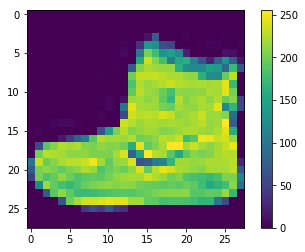

In [0]:
# matplotlib을 통해 그림을 그린다.
plt.figure()
# train_images의 첫번째 요소를 그린다.
plt.imshow(train_images[0])
plt.colorbar()
# 점자선을 False로 둠으로써 없앤다.
plt.gca().grid(False)

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

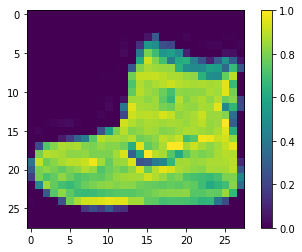

In [0]:
# matplotlib을 통해 그림을 그린다.
plt.figure()
# train_images의 첫번째 요소를 그린다.
plt.imshow(train_images[0])
plt.colorbar()
# 점자선을 False로 둠으로써 없앤다.
plt.gca().grid(False)

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


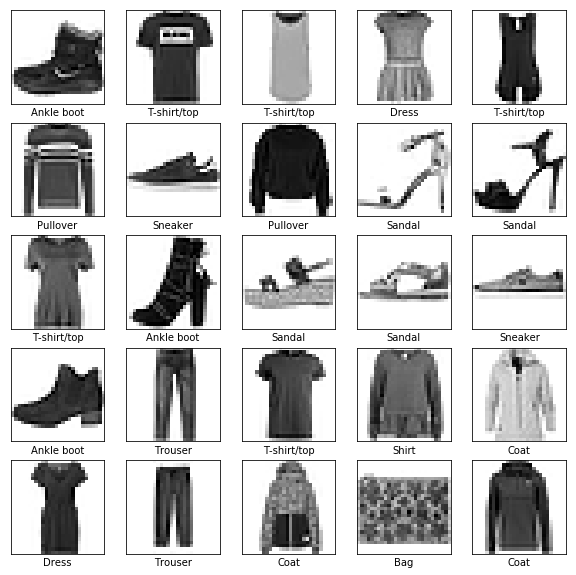

In [0]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

W0821 04:45:27.032732 139944487069568 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 4s 68us/sample - loss: 0.4990 - acc: 0.8233
Epoch 2/5
60000/60000 [==============================] - 4s 61us/sample - loss: 0.3687 - acc: 0.8651
Epoch 3/5
60000/60000 [==============================] - 4s 61us/sample - loss: 0.3336 - acc: 0.8795
Epoch 4/5
60000/60000 [==============================] - 4s 60us/sample - loss: 0.3104 - acc: 0.8868
Epoch 5/5
60000/60000 [==============================] - 4s 59us/sample - loss: 0.2929 - acc: 0.8924


In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 34us/sample - loss: 0.3634 - acc: 0.8720
Test accuracy: 0.872


In [0]:
predictions = model.predict(test_images)

In [0]:
predictions[0]

array([2.5452257e-05, 1.6931018e-06, 2.8687116e-06, 1.2988371e-06,
       2.8005909e-06, 4.0852875e-02, 5.7495640e-06, 1.5499838e-01,
       1.7832215e-05, 8.0409110e-01], dtype=float32)

In [0]:
np.argmax(predictions[0])

9

In [0]:
test_labels[0]

9

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


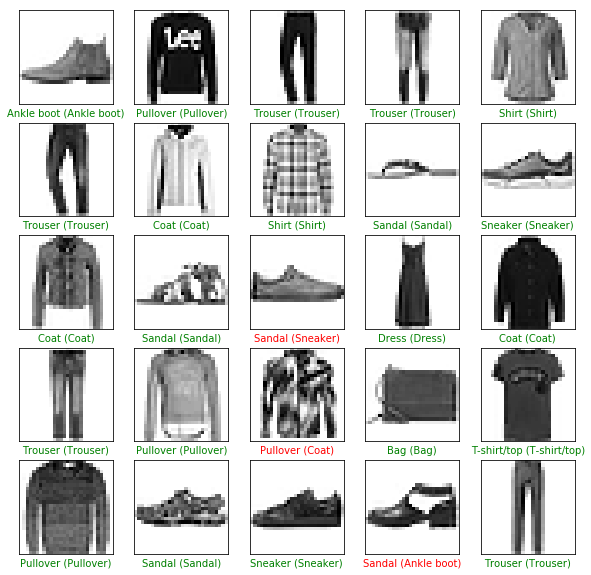

In [0]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    # predictions에서 가장 큰 값을 predicted_label 로 가져온다.
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    # 이때 실제 test_label과 일치하면 초록색 글씨로,
    if predicted_label == true_label:
      color = 'green'
    # 일치하지 않으면 빨간색 글씨로 출력한다.
    else:
      color = 'red'
    plt.xlabel("{} ({})".format(class_names[predicted_label], 
                                  class_names[true_label]),
                                  color=color)